# ***Araştırma sorularına ve sonuçlarına genel bakış:***
---
1.  **Proje hangi amaçla gerçekleştirildi?**

> Projenin gerçekleştirme amacı, rahim ağzı kanseri için risk faktörleri değerlendirilerek hangi faktörlerin bu hastalığı çok etkilediği , hangi durumlarda az etkilediği hakkında bilgi sahibi olur. Bu sayede hangi risk faktör ile hastalığın olma ihtimali tahmin edilebilmektedir.

2.   Projede hesaplanmak istenen nedir ?

> Projede veri setindeki bilgilere (yaşı , gebelik sayısı vb.) bakılarak incelenen kişinin rahim ağzı kanseri olup olmadığı ortaya çıkarılabilir. 

3.  Projede hesaplanmak istenen  neden seçilmiştir ?

> Hesaplanmak için seçilen verilerin bilgilerine göre hastalığın hangi durumlara göre yani hangi yaş grubunda kişinin rahim ağzı kanseri olup olmadığı ortaya çıkarılabilir.






# ***Motivasyon ve arka plan:***
---
Seçtiğim problem, rahim ağzı kanseri için risk faktörleri değerlendirilerek hastalık hakkında tahmin yapılmaktadır.Bu sorunun önemi, kişinin  risk faktörlerine göre hangi faktörlerin bu hastalığı çok etkilediği , hangi durumlarda az etkilediği hakkında bilgi sahibi olur. 

# ***Veri kümesi ile ilgili bilgiler:***
---

>  Kullanılan veri seti : Cervical cancer (Risk Factors) Data Set

 Veri seti Venezuela, Caracas üniversitesi hastanesinden toplanmıştır.  Veri seti, 858 hastanın demografik bilgilerini, alışkanlıklarını ve geçmiş tıbbi kayıtlarını içerir. Birkaç hasta gizlilik  endişeleri (eksik değerler) nedeniyle bazı soruları yanıtlamamaya karar verilmiştir.

Veri setinde örnek sayısı 858 'dır. Nitelik sayısı ise 36'dır.

 Veri setinine [buradan](https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29) ulaşabilirsiniz.














 




# ***Metodoloji:***

---

Kullanılacak Algoritmalar


1.   KNN Classifier
2.   Random Forest Classifier
3.   YSA


# ***Sonuçlar:***
---
Veri setindeki eksik veriler en çok tekrar eden değer ile değiştirilerek eksik veriler giderilmiştir.  Aykırı verileri ortalama ile değiştirilerek aykırı veriler giderilmiştir. Daha sonra KNN, Random Forest ve YSA algoritmaları hiper parametre ayarlaması yapılarak  başarı değerlendirme yapılmıştır. Tüm algoritmalarda %83.3333 başarı elde edilmiştir.




## Kütüphane ve Veri Setini Projeye Dahil Etme

In [ ]:
#Kütüphaneleri Dahil Etme
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
#veri setini dahil etme
df = pd.read_csv('/content/risk_factors_cervical_cancer.csv')  
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


## Veri Seti İle İlgili Bilgiler

In [ ]:
#veri setinde ilk beş veri
df.head() 

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
#veri setinde kaç satır ve sütun olduğunu öğrenmek için
df.shape

(858, 36)

In [ ]:
#veri setine ait bilgiler görünür
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
df.Smokes.value_counts()

0.0    722
1.0    123
?       13
Name: Smokes, dtype: int64

In [ ]:
df["STDs:molluscum contagiosum"].value_counts()

0.0    752
?      105
1.0      1
Name: STDs:molluscum contagiosum, dtype: int64

In [ ]:
df.describe() # temel istatisliki bilgileri getiren fonksiyon

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Eksik Veri Analizi ve Görselleştirme


In [ ]:
#veri setinde eksik değerleri ? olarak ifade edilmiş. Bunu nan değerine dönüştürmek için
df= df.replace('?',np.nan)

In [ ]:
#Veri setindeki eksik değerlerinin sayısı
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

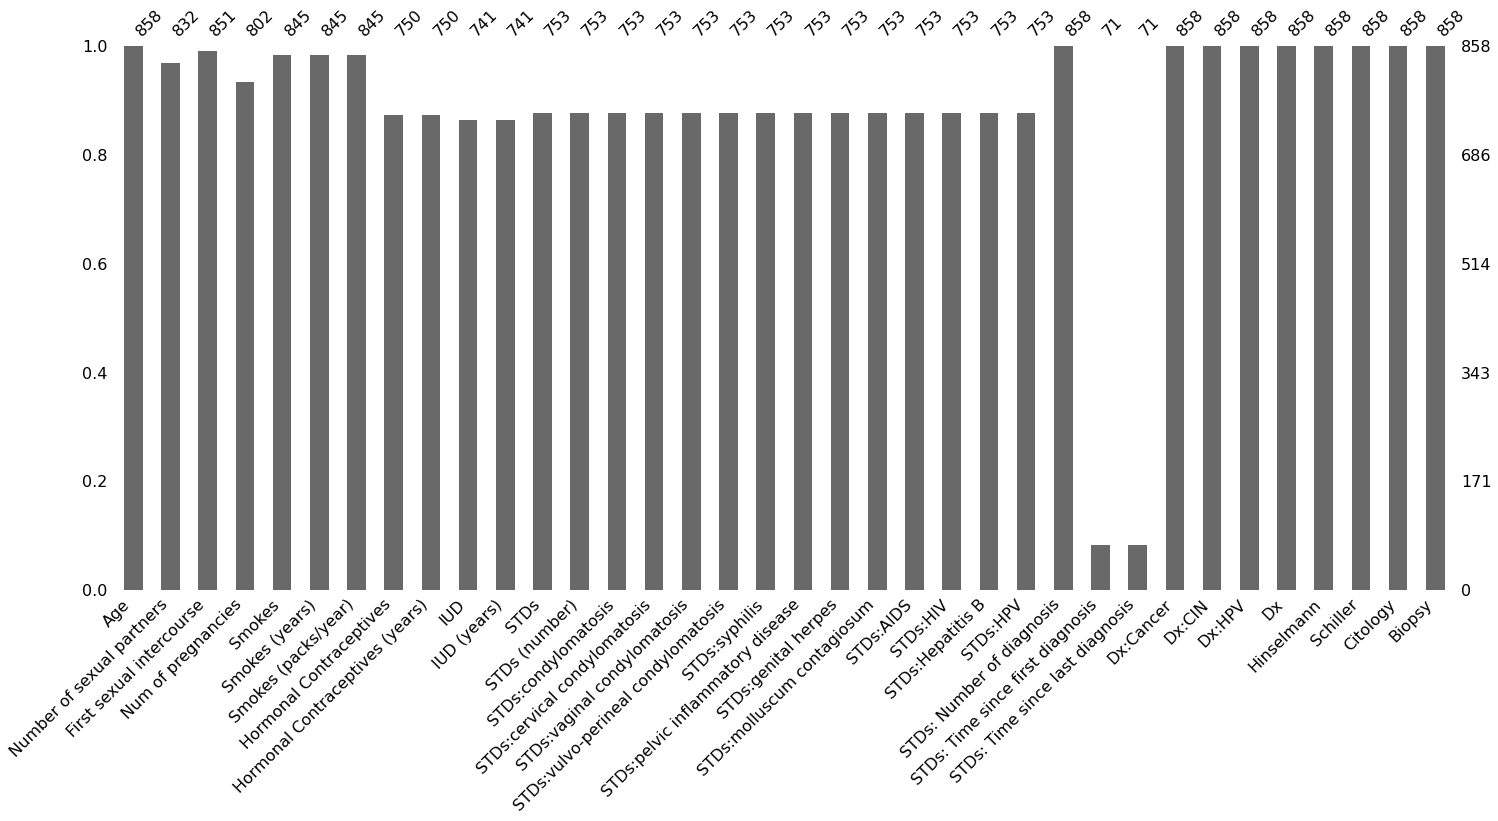

In [ ]:
msno.bar(df)

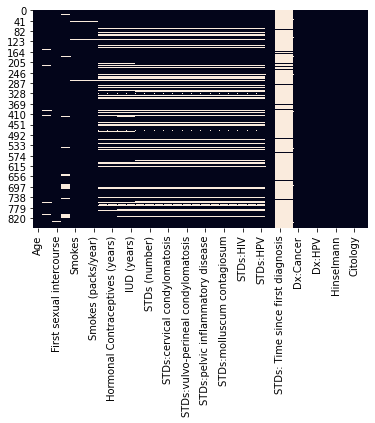

In [ ]:
sns.heatmap(df.isnull(), cbar = False); 

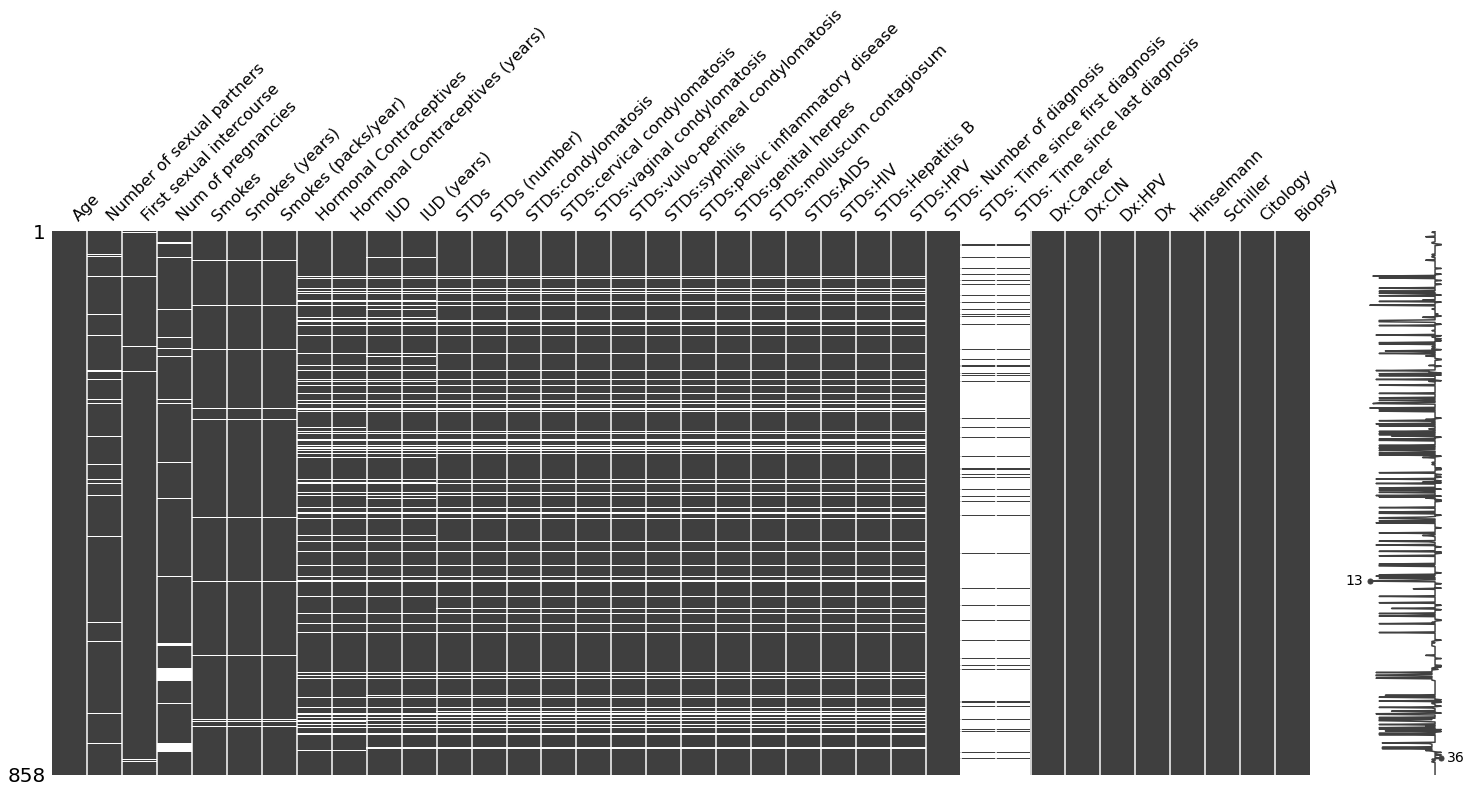

In [ ]:
msno.matrix(df)

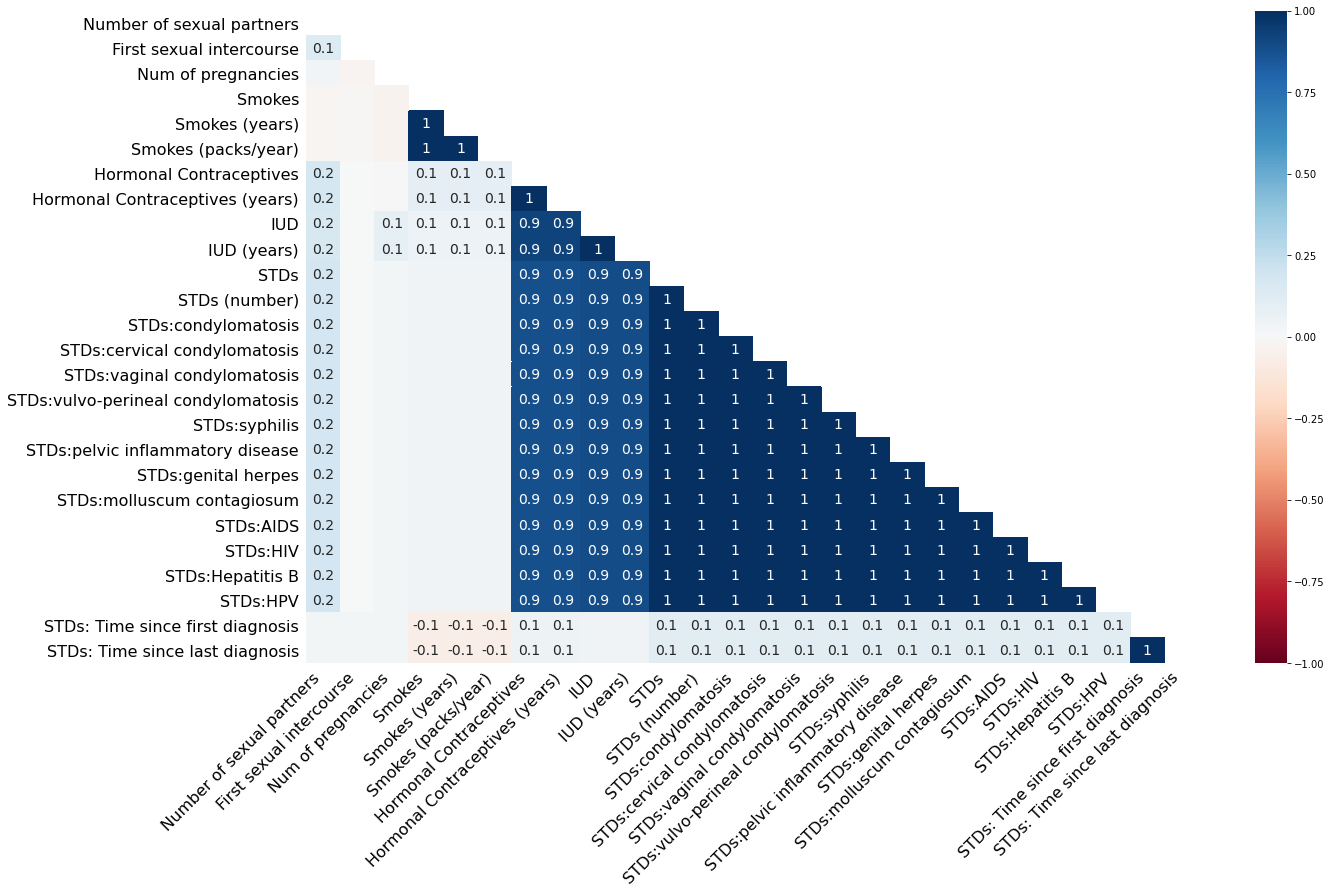

In [ ]:
msno.heatmap(df)

Age                          0
STDs: Number of diagnosis    0
Dx:Cancer                    0
Dx:CIN                       0
Dx:HPV                       0
Dx                           0
Hinselmann                   0
Schiller                     0
Citology                     0
Biopsy                       0
dtype: int64


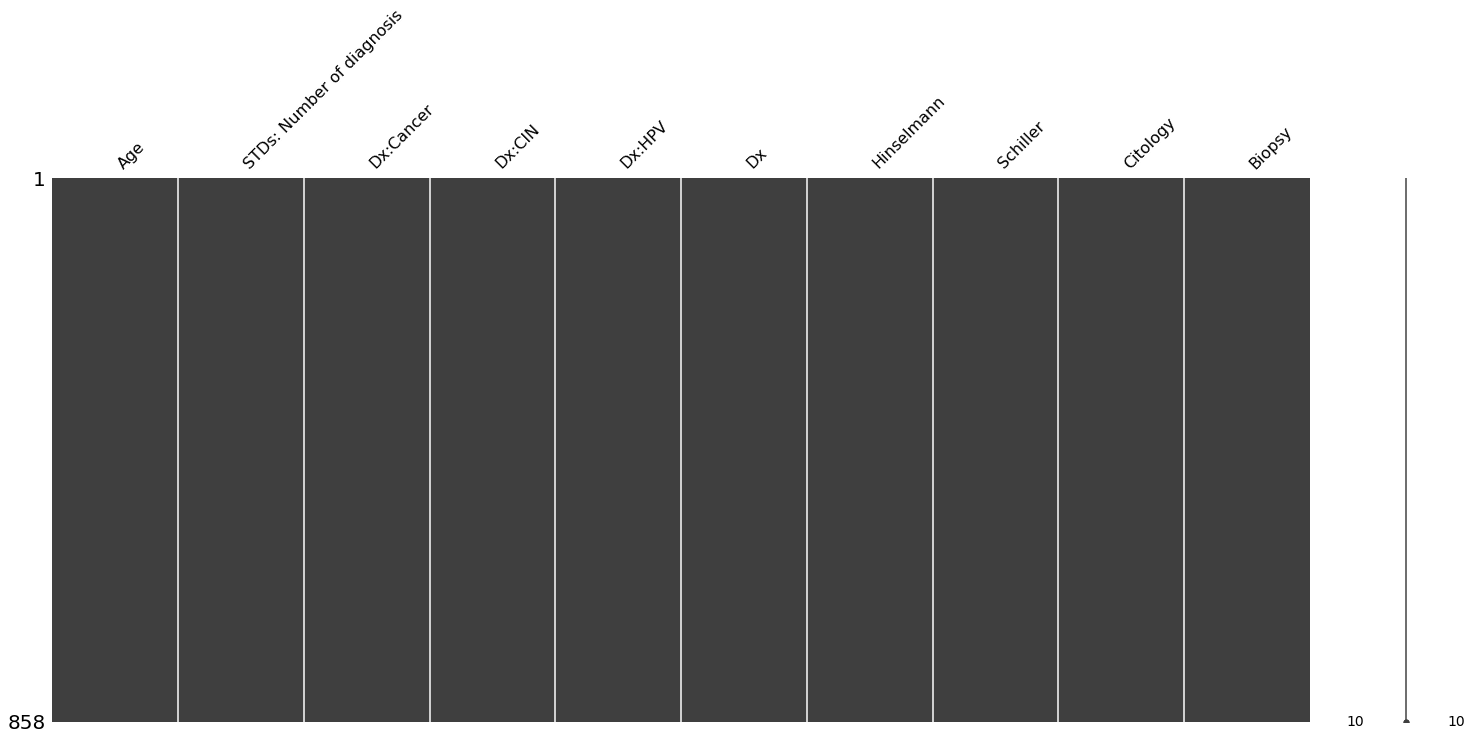

In [ ]:
#int ve float değerlerinde eksik veri olup olmadığının kontrolü
import seaborn as sns
df_sayisal = df.select_dtypes(include = ['float64', 'int64'])
print(df_sayisal.isnull().sum())
msno.matrix(df_sayisal)

Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                          

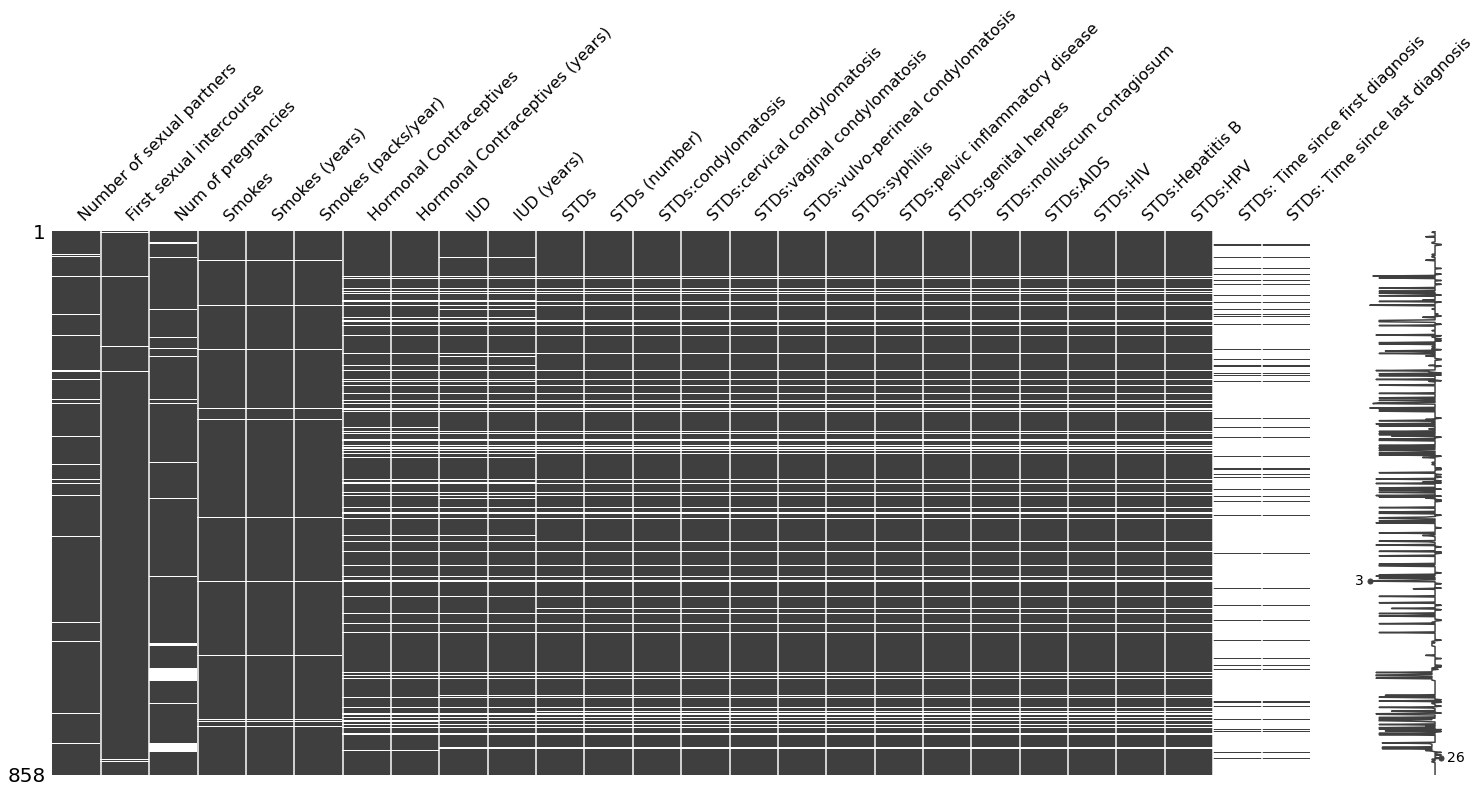

In [ ]:
#object değerlerinde eksik veri olup olmadığının kontrolü
df_object = df.select_dtypes(include = ['object'])
print(df_object.isnull().sum())
msno.matrix(df_object)

In [ ]:
# eksik veri bulunan Number of sexual partners sütununun incelenmesi
df["Number of sexual partners"].value_counts()

2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
28.0      1
10.0      1
15.0      1
9.0       1
Name: Number of sexual partners, dtype: int64

In [ ]:
#en çok tekrar eden değer ile eksik veri giderimi
df["Number of sexual partners"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True) 

In [ ]:
 #en çok tekrar eden değer ile eksik veri giderimi
df["First sexual intercourse"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["Num of pregnancies"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["Smokes"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True) 
df["Smokes (years)"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True) 
df["Smokes (packs/year)"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["Hormonal Contraceptives"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True) 
df["Hormonal Contraceptives (years)"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["IUD (years)"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True) 
df["IUD"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs (number)"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs:condylomatosis"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs:cervical condylomatosis"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True) 
df["STDs:vaginal condylomatosis"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs:vulvo-perineal condylomatosis"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs:syphilis"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True) 
df["STDs:pelvic inflammatory disease"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs:genital herpes"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs:molluscum contagiosum"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True) 
df["STDs:AIDS"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs:HIV"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs:Hepatitis B"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True) 
df["STDs:HPV"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs: Time since first diagnosis"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)
df["STDs: Time since last diagnosis"].fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True)

In [ ]:
# veri seti içindeki tüm eksik veriler giderildi
df.isnull().sum() 

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


## Aykırı Veri Analizi ve Görselleştirme

In [ ]:
cercivalCancer=pd.read_csv("/content/risk_factors_cervical_cancer.csv")
df = cercivalCancer.copy()
df = df.replace('?',np.NaN)


In [ ]:
df.describe() # temel istatisliki bilgileri getiren fonksiyon

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_Age = df["Age"]
df_Age.head()

0    18
1    15
2    34
3    52
4    46
Name: Age, dtype: int64

In [ ]:
df_Age.describe()

count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64

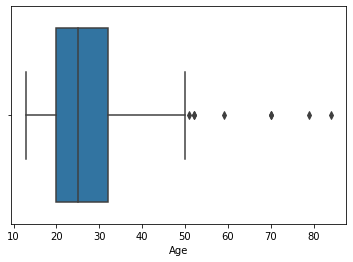

In [ ]:
sns.boxplot(x=df_Age)

In [ ]:
# Aykırı deger icin bir eşik değeri belirleme
q1=df_Age.quantile(0.25)
q3=df_Age.quantile(0.75)
iqr=q3-q1
alt_sinir=q1-1.5*iqr
ust_sinir=q3+1.5*iqr

In [ ]:
alt_sinir

2.0

In [ ]:
ust_sinir

50.0

In [ ]:
outlier_ind=((df_Age<alt_sinir)|(df_Age>ust_sinir)) 
outlier_ind

0      False
1      False
2      False
3       True
4      False
       ...  
853    False
854    False
855    False
856    False
857    False
Name: Age, Length: 858, dtype: bool

In [ ]:
df_Age[outlier_ind].index

Int64Index([3, 6, 652, 667, 668, 671, 676, 682], dtype='int64')

In [ ]:
df_Age[outlier_ind]

3      52
6      51
652    59
667    79
668    84
671    52
676    70
682    70
Name: Age, dtype: int64

In [ ]:
#ortalama
ort=df_Age.mean()
ort

26.82051282051282

In [ ]:
df_Age.describe()

count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64

In [ ]:
df_Age[outlier_ind]=ort
df_Age[outlier_ind]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3      26.820513
6      26.820513
652    26.820513
667    26.820513
668    26.820513
671    26.820513
676    26.820513
682    26.820513
Name: Age, dtype: float64

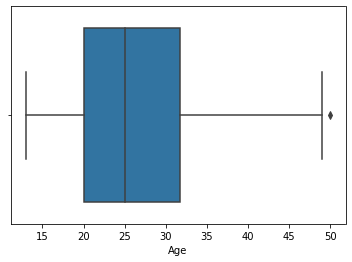

In [ ]:
sns.boxplot(x=df_Age)

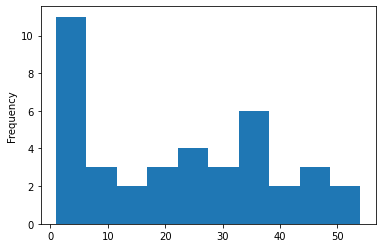

In [ ]:
(df["Age"].value_counts().plot.hist());

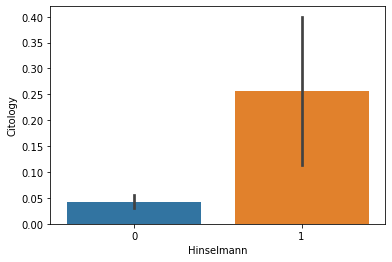

In [ ]:
sns.barplot(x = "Hinselmann", y = "Citology", data = df);

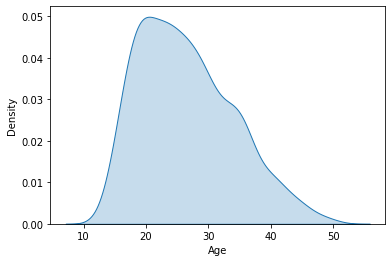

In [ ]:
sns.kdeplot(df.Age, shade = True);

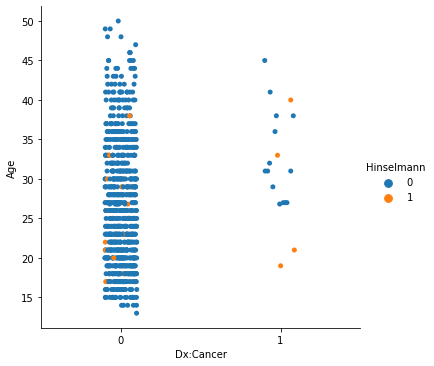

In [ ]:
sns.catplot(x="Dx:Cancer", y="Age",hue="Hinselmann",data=df);

##KNN Algoritması  ve Hiperparametre Ayarlaması

In [ ]:
#kütüphane dahil etme
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [ ]:
cercivalCancer=pd.read_csv("risk_factors_cervical_cancer.csv")
df = cercivalCancer.copy()
df = df.replace('?',np.NaN)
df = df.dropna()

In [ ]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
21,41,3.0,17.0,4.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21.0,21.0,0,0,0,0,0,0,0,0
22,40,1.0,18.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,2.0,0,0,0,0,0,1,1,1
59,35,3.0,17.0,4.0,0.0,0.0,0.0,1.0,7.0,1.0,0.08,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19.0,19.0,0,0,0,0,0,0,0,0
68,35,3.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,3.0,0,0,0,0,0,0,0,0
78,35,3.0,17.0,6.0,1.0,13.0,2.6,1.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12.0,12.0,0,0,0,0,0,1,0,0


In [ ]:
y=df["Citology"]
y.value_counts()

0    52
1     7
Name: Citology, dtype: int64

In [ ]:
X=df.drop(["Citology"],axis=1)
X

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Biopsy
21,41,3.0,17.0,4.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21.0,21.0,0,0,0,0,0,0,0
22,40,1.0,18.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,2.0,0,0,0,0,0,1,1
59,35,3.0,17.0,4.0,0.0,0.0,0.0,1.0,7.0,1.0,0.08,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19.0,19.0,0,0,0,0,0,0,0
68,35,3.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,3.0,0,0,0,0,0,0,0
78,35,3.0,17.0,6.0,1.0,13.0,2.6,1.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12.0,12.0,0,0,0,0,0,1,0
84,36,2.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0,0,0,0,0,0,0
101,30,5.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,11.0,11.0,0,0,0,0,0,0,0
112,30,3.0,19.0,2.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9.0,9.0,0,0,0,0,0,0,0
134,30,3.0,14.0,3.0,0.0,0.0,0.0,1.0,12.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.0,7.0,0,0,0,0,0,0,0
147,29,4.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,8.0,8.0,0,0,0,0,0,0,0


In [ ]:
#Veri setimin %70 eğitim, %30 test oalcak şekilde bölelim
X_train,X_test,y_train, y_test=train_test_split(X,y,
                                              test_size=0.30,
                                              random_state=42)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
X_train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Biopsy
786,25,6.0,17.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,4.0,4.0,0,0,0,0,0,1,1
236,24,2.0,15.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2.0,2.0,0,0,0,0,0,0,0
418,17,1.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,2.0,0,0,0,0,0,0,0
742,19,7.0,14.0,2.0,0.0,0.0,0.0,1.0,0.16,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,4.0,0,0,0,0,0,0,0
614,24,1.0,23.0,1.0,0.0,0.0,0.0,1.0,0.75,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0,0,0,0,0,1,1
789,20,1.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0,0,0,0,0,0,0
203,28,2.0,19.0,2.0,0.0,0.0,0.0,1.0,0.42,1.0,3.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.0,7.0,0,0,0,0,1,1,1
147,29,4.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,8.0,8.0,0,0,0,0,0,0,0
394,20,2.0,18.0,1.0,1.0,13.0,7.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,21.0,21.0,0,0,0,0,0,0,0
388,20,3.0,14.0,3.0,1.0,4.0,0.2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0,0,0,0,0,0,0


In [ ]:
y_train

786    1
236    0
418    0
742    0
614    1
789    0
203    0
147    0
394    0
388    0
213    0
376    0
448    0
822    0
590    0
170    0
426    0
749    0
563    0
508    0
407    0
613    0
22     1
325    0
59     0
674    0
556    0
498    0
374    0
687    1
165    0
355    0
227    0
831    0
295    0
112    0
597    0
202    0
397    0
743    0
539    0
Name: Citology, dtype: int64

In [ ]:
knn_model=knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred=knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8333333333333334

In [ ]:
confusion_matrix(y_pred,y_test)

array([[15,  3],
       [ 0,  0]])

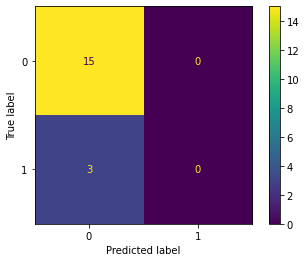

In [ ]:
plot_confusion_matrix(knn,X_test,y_test)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.00      0.00      0.00         3

    accuracy                           0.83        18
   macro avg       0.42      0.50      0.45        18
weighted avg       0.69      0.83      0.76        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# hiper parametre ayarlaması
knn_params = {"n_neighbors" : np.arange(1,5)}
knn=KNeighborsClassifier()
knn_cv = GridSearchCV(knn,
                     knn_params,
                     cv=5,
                     n_jobs = -1,
                     return_train_score = "true")

In [ ]:
knn_cv.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([1, 2, 3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='true',
             scoring=None, verbose=0)

In [ ]:
knn_allResults = knn_cv.cv_results_
knn_allResults

{'mean_fit_time': array([0.00314941, 0.00386734, 0.0027616 , 0.00278225]),
 'mean_score_time': array([0.00404439, 0.00304666, 0.00363827, 0.00277548]),
 'mean_test_score': array([0.82777778, 0.90277778, 0.87777778, 0.90277778]),
 'mean_train_score': array([1.        , 0.90246212, 0.89640152, 0.90246212]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4}],
 'rank_test_score': array([4, 1, 3, 1], dtype=int32),
 'split0_test_score': array([0.88888889, 0.88888889, 0.88888889, 0.88888889]),
 'split0_train_score': array([1.     , 0.90625, 0.90625, 0.90625]),
 'split1_test_score': array([0.875, 0.875, 0.875, 0.875]),
 'split1_train_score': array([1.        , 0.90909091, 0.90909091, 0.90909091]),
 'split2_test_score': array([0.75 , 0.875, 0.75 , 0.875]),
 'split2_train_score': array([1.        

In [ ]:
df_grid=pd.DataFrame(knn_allResults)
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003149,0.000307,0.004044,0.002026,1,{'n_neighbors': 1},0.888889,0.875,0.750,0.625,1.0,0.827778,0.128680,4,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003867,0.002134,0.003047,0.000505,2,{'n_neighbors': 2},0.888889,0.875,0.875,0.875,1.0,0.902778,0.048908,1,0.90625,0.909091,0.909091,0.909091,0.878788,0.902462,0.011888
2,0.002762,0.000095,0.003638,0.001752,3,{'n_neighbors': 3},0.888889,0.875,0.750,0.875,1.0,0.877778,0.079252,3,0.90625,0.909091,0.909091,0.878788,0.878788,0.896402,0.014419
3,0.002782,0.000094,0.002775,0.000014,4,{'n_neighbors': 4},0.888889,0.875,0.875,0.875,1.0,0.902778,0.048908,1,0.90625,0.909091,0.909091,0.909091,0.878788,0.902462,0.011888


In [ ]:
knn_best_model = knn_cv.best_estimator_

#Elimizdeki en iyi modelin performansı (Çapraz doğrulamaya(Cross-validation) göre)

knn_crossVal=knn_cv.best_score_
knn_crossVal

0.9027777777777779

In [ ]:
knn_tuned_teslim=knn_best_model.fit(X,y)
knn_tuned_teslim.score(X,y)

0.8813559322033898

## YSA Algoritması ve  ve Hiperparametre Ayarlaması

In [ ]:
# Aynı veri setini bir de YSA kullanarak sınıflandırma
from sklearn.neural_network import MLPClassifier

#  YSA'nın test edilmesi planlanan hiperparametreleri 
mlpc_params = {"alpha": [0.1, 0.01, ],
           "hidden_layer_sizes": [(5,5),
                                  (10,),
                                  ],
           "solver" : ["lbfgs","adam"],
           "activation": ["relu"]}


mlpc = MLPClassifier()

In [ ]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                             cv = 5, 
                             n_jobs = -1,
                             verbose = 2,
                             return_train_score='true'  )
mlpc_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'

In [ ]:
mlpc_all_results=mlpc_cv_model.cv_results_
df_mlpc_results=pd.DataFrame(mlpc_all_results)
df_mlpc_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.107760,0.071050,0.002777,0.000792,relu,0.1,"(5, 5)",lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.888889,0.875,0.875,0.875,1.0,0.902778,0.048908,1,0.96875,0.909091,0.909091,1.000000,1.000000,0.957386,0.041051
1,0.187077,0.004767,0.002355,0.000088,relu,0.1,"(5, 5)",adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.888889,0.875,0.875,0.875,1.0,0.902778,0.048908,1,0.93750,0.909091,0.909091,0.909091,0.848485,0.902652,0.029233
2,0.107511,0.063038,0.002203,0.000098,relu,0.1,"(10,)",lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.888889,0.875,0.750,0.875,1.0,0.877778,0.079252,5,1.00000,1.000000,1.000000,1.000000,0.878788,0.975758,0.048485
3,0.154471,0.012182,0.002269,0.000053,relu,0.1,"(10,)",adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.888889,0.875,0.875,0.875,1.0,0.902778,0.048908,1,0.96875,0.909091,0.909091,0.939394,0.939394,0.933144,0.022374
4,0.110597,0.090215,0.002340,0.000084,relu,0.01,"(5, 5)",lbfgs,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.777778,0.875,0.875,0.875,1.0,0.880556,0.070601,4,1.00000,0.909091,0.909091,1.000000,0.878788,0.939394,0.050707
5,0.197781,0.011348,0.002252,0.000107,relu,0.01,"(5, 5)",adam,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.888889,0.750,0.875,0.875,1.0,0.877778,0.079252,5,0.90625,0.848485,0.909091,0.909091,0.878788,0.890341,0.023840
6,0.048187,0.049770,0.002108,0.000193,relu,0.01,"(10,)",lbfgs,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.888889,0.875,0.875,0.750,1.0,0.877778,0.079252,5,1.00000,0.909091,0.939394,1.000000,0.878788,0.945455,0.048485
7,0.141003,0.020201,0.002052,0.000351,relu,0.01,"(10,)",adam,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.777778,0.875,0.750,0.875,1.0,0.855556,0.088104,8,0.96875,0.909091,0.939394,0.909091,0.909091,0.927083,0.023912


In [ ]:
# Öncelikle en iyi sonucu veren model seçilir
#En iyi sonuc'dan kasıt test verisi için çapraz dogrulama skorlarının ortalaması en yüksek olduğu komşuluk sayısıdır.
# o yüzden sıra değerini belirten "rank" sutun değeri 1'dir. Bu modele aşağıdaki komutu kullanarak ulaşabiliriz.

mlpc_best_model=mlpc_cv_model.best_estimator_

#Elimizdeki en iyi modelin performansı (Çapraz doğrulamaya(Cross-validation) göre)

mlpc_crossVal=mlpc_cv_model.best_estimator_
mlpc_crossVal
# En iyi modele ait parametreler
mlpc_cv_model.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (5, 5),
 'solver': 'lbfgs'}

In [ ]:
# Tüm modelleri aynı anda kıyaslama sonuçlarını görmek için 
modeller = [
    knn_best_model,
    mlpc_best_model
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk_holdout = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy_holdout: {:.4%}".format(dogruluk_holdout))


----------------------------
KNeighborsClassifier:
Accuracy_holdout: 83.3333%
----------------------------
MLPClassifier:
Accuracy_holdout: 83.3333%


## Random Forest Classifier  ve Hiperparametre Ayarlaması

In [ ]:
cercivalCancer=pd.read_csv("risk_factors_cervical_cancer.csv")
df = cercivalCancer.copy()
df = df.replace('?',np.NaN)
df = df.dropna()

In [ ]:
y=df['Citology']
X=df.drop(["Citology"],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       <=50K       0.83      1.00      0.91        15
        >50K       0.00      0.00      0.00         3

    accuracy                           0.83        18
   macro avg       0.42      0.50      0.45        18
weighted avg       0.69      0.83      0.76        18



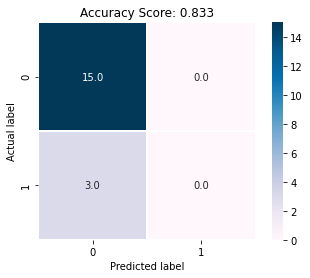

In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                            random_state=0, max_features= 10, 
                            max_depth= 5)
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)

print(classification_report(y_test, rf_predict, target_names=['<=50K', '>50K']))

score = round(accuracy_score(y_test, rf_predict),3)
cm1 = cm(y_test, rf_predict)

sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
            square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()

In [ ]:
print(cross_val_score(RandomForestClassifier(n_estimators=100, 
                                 n_jobs=-1, random_state=0, max_features= 10, 
                            max_depth= 5), 
                              X_train, y_train, cv=5))
print('')
print('mean of cv-scores: {0}'.format(round(np.mean(cross_val_score(RandomForestClassifier(n_estimators=100, 
                                 n_jobs=-1, random_state=42, max_features= 10, 
                            max_depth= 5), 
                              X_train, y_train, cv=5)),4)))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[1. 1. 1. 1. 1.]



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


mean of cv-scores: 1.0


In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=0)

rf_params = {'max_depth': range(3,13), 'max_features': range(5,15)}

rf_grid = GridSearchCV(rf, rf_params,
                           cv=5, n_jobs=-1, 
                       verbose=True)

rf_grid.fit(X_train, y_train)
print('')
print(rf_grid.best_params_)
print('Best cv mean result: {0}'.format(round(rf_grid.best_score_,5)))
print('Best holdout result: {0}'.format(round(accuracy_score(y_test, rf_grid.predict(X_test)),5)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished



{'max_depth': 3, 'max_features': 9}
Best cv mean result: 1.0
Best holdout result: 0.83333


## Özellik Seçimi


> Anova Özellik Seçimi



In [ ]:
#kütüphaneleri dahil etme
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
cercivalCancer=pd.read_csv("risk_factors_cervical_cancer.csv")
df = cercivalCancer.copy()
df = df.replace('?',np.NaN)
df = df.dropna()

In [ ]:
y=df['Citology']
y.value_counts()

0    52
1     7
Name: Citology, dtype: int64

In [ ]:
X=df.drop(["Citology"],axis=1)
X

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Biopsy
21,41,3.0,17.0,4.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21.0,21.0,0,0,0,0,0,0,0
22,40,1.0,18.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,2.0,0,0,0,0,0,1,1
59,35,3.0,17.0,4.0,0.0,0.0,0.0,1.0,7.0,1.0,0.08,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19.0,19.0,0,0,0,0,0,0,0
68,35,3.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,3.0,0,0,0,0,0,0,0
78,35,3.0,17.0,6.0,1.0,13.0,2.6,1.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,12.0,12.0,0,0,0,0,0,1,0
84,36,2.0,15.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,0,0,0,0,0,0,0
101,30,5.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,11.0,11.0,0,0,0,0,0,0,0
112,30,3.0,19.0,2.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,9.0,9.0,0,0,0,0,0,0,0
134,30,3.0,14.0,3.0,0.0,0.0,0.0,1.0,12.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.0,7.0,0,0,0,0,0,0,0
147,29,4.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,8.0,8.0,0,0,0,0,0,0,0


In [ ]:

fs = SelectKBest(score_func=f_classif, k=7)
#apply feature selection
X_selected = fs.fit_transform(X, y)
print(X.shape)
print(X_selected.shape)

(59, 35)
(59, 7)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [11 14 21 29] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
